In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [94]:
def plot_particle(pos, vel=[]):
    plt.scatter(*pos.T)
    if vel !=[]:
        plt.plot(np.block([pos, pos+vel])[:, ::2].T, np.block([pos, pos+vel])[:, 1::2].T, c='blue')
    plt.xlim(0,1)
    plt.ylim(0,1)
    

In [48]:
# スキーム
def calculate_distance_matrix(pos):
    n_sample, dim = pos.shape
    
    distance_mtx = np.zeros([n_sample, n_sample])
    for i in range(n_sample):
        for j in range(n_sample):
            dist = np.linalg.norm(pos[i] - pos[j])
            distance_mtx[i,j] = dist
    
    return distance_mtx


def calculate_weight_matrix(pos, r_e):
    n_sample, dim = pos.shape
    
    distance_mtx = calculate_distance_matrix(pos)
    weight_mtx = np.where((distance_mtx < r_e)&(distance_mtx > 0), r_e / distance_mtx - 1, 0)
    
    return weight_mtx


def calculate_laplacian(val, n_0, lambda_0, weight=1):
    n_sample, dim = val.shape
    
    laplacian = np.empty([n_sample, dim])
    for i, v in enumerate(val):
        w = np.repeat([weight[i]], dim, axis=0).T
        laplacian[i] = (2*dim)/(lambda_0*n_0) * sum((v - val)* w)
        
    return laplacian




(150, 2)

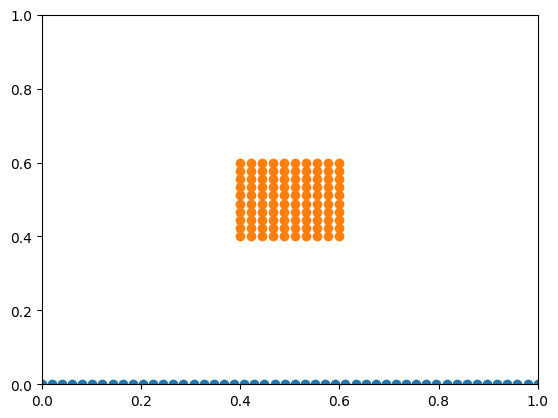

In [101]:
### 初期条件
# 固定壁
x = np.linspace(0, 1, 50)
y = np.linspace(0, 0, 50)
pos_rigid = np.block([[x], [y]]).T
vel_rigid = np.zeros((50, 2))


# 水
x = np.linspace(0.4, 0.6, 10)
y = np.linspace(0.4, 0.6, 10)
xx, yy = np.meshgrid(x, y)

# 位置
pos_water = np.block([[xx.flatten()], [yy.flatten()]]).T
n_sample, dim = pos_water.shape

# 物理量
vel_water = np.ones([n_sample, dim])*0.1

plot_particle(pos_rigid)
plot_particle(pos_water)



# 結合しておく
pos_rigid.shape, pos_water.shape
pos = np.block([[pos_rigid], [pos_water]])
vel = np.block([[vel_rigid], [vel_water]])


In [85]:
### 解析条件
#時間 
dT = 0.01
t_max = 3

# パラメータ
r_e = 0.2
nu = 0.1
rho = 1000
g = [0,0]#[0, -9.80665]




#  
# 初期点群の距離，重みの計算
init_distance_mtx = calculate_distance_matrix(pos)
init_weight_mtx = calculate_weight_matrix(pos, r_e)
# 粒子数密度の保存条件
n_0 = np.sum(init_weight_mtx) 
# 粒子の分散の保存条件
lambda_0 =  np.sum(init_distance_mtx * init_weight_mtx) / np.sum(init_weight_mtx)



# 時系列
timeseries = np.arange(0, t_max, dT)
pos_timeseries = np.empty([len(timeseries), n_sample, dim])

for ind, t in enumerate(timeseries):
    # 保存
    pos_timeseries[ind] = pos
    
    # 重みの計算
    weight_mtx = calculate_weight_matrix(pos, r_e)
    
    # 粘性項の計算
    du_dxx = calculate_laplacian(vel, n_0, lambda_0, weight_mtx)

    # 仮の流速と，粒子数密度
    vel_tentative = vel + dT * (nu * du_dxx + g)
    n_star = np.sum(calculate_weight_matrix(vel_tentative, r_e))
    
    b = 1 / dT**2 * (n_star - n_0) / n_0
    
    
    # 位置を修正
    pos += dT * vel    


/tmp/ipykernel_2807665/2413693121.py:18: RuntimeWarning: divide by zero encountered in divide
  weight_mtx = np.where((distance_mtx < r_e)&(distance_mtx > 0), r_e / distance_mtx - 1, 0)
/tmp/ipykernel_2807665/2413693121.py:18: RuntimeWarning: divide by zero encountered in divide
  weight_mtx = np.where((distance_mtx < r_e)&(distance_mtx > 0), r_e / distance_mtx - 1, 0)
/tmp/ipykernel_2807665/2413693121.py:18: RuntimeWarning: divide by zero encountered in divide
  weight_mtx = np.where((distance_mtx < r_e)&(distance_mtx > 0), r_e / distance_mtx - 1, 0)
/tmp/ipykernel_2807665/2413693121.py:18: RuntimeWarning: divide by zero encountered in divide
  weight_mtx = np.where((distance_mtx < r_e)&(distance_mtx > 0), r_e / distance_mtx - 1, 0)
/tmp/ipykernel_2807665/2413693121.py:18: RuntimeWarning: divide by zero encountered in divide
  weight_mtx = np.where((distance_mtx < r_e)&(distance_mtx > 0), r_e / distance_mtx - 1, 0)
/tmp/ipykernel_2807665/2413693121.py:18: RuntimeWarning: divide by zer

KeyboardInterrupt: 

In [83]:
for i in range(0, 300, 50):
    print(pos_timeseries[i, 1])

[0.42222222 0.4       ]
[0.47222222 0.45      ]
[0.52222222 0.5       ]
[0.57222222 0.55      ]
[0.62222222 0.6       ]
[0.67222222 0.65      ]


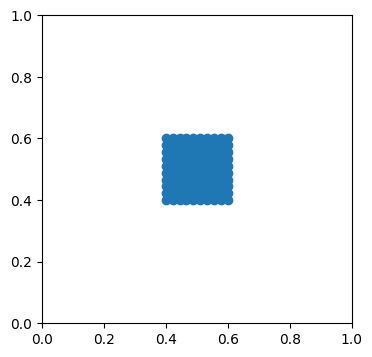

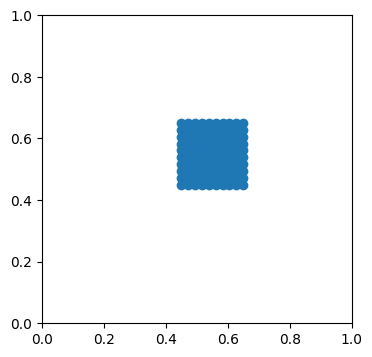

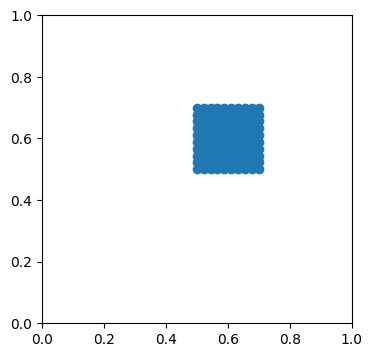

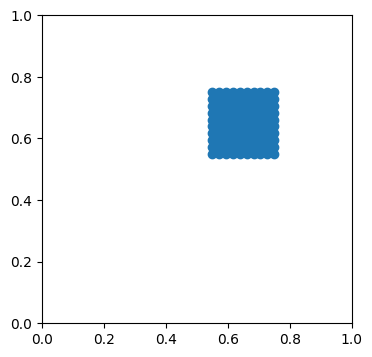

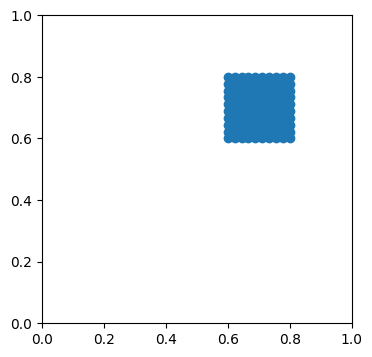

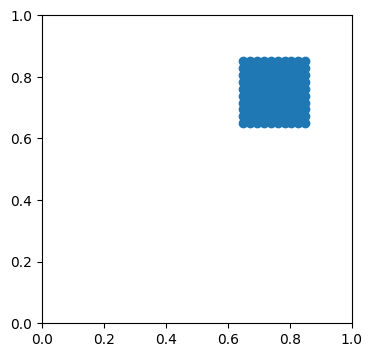

In [84]:
for i in range(0, 300, 50):
    plot_particle(pos_timeseries[i])